In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")
train_ori=train.copy()
test_ori=test.copy()

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(train.shape,test.shape)

(614, 13) (367, 12)


In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
for i in train.columns:
    print(train[i].value_counts())

LP001732    1
LP002716    1
LP002205    1
LP002767    1
LP002837    1
           ..
LP002928    1
LP002263    1
LP001426    1
LP001935    1
LP001940    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

In [9]:
train.Loan_Status.value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

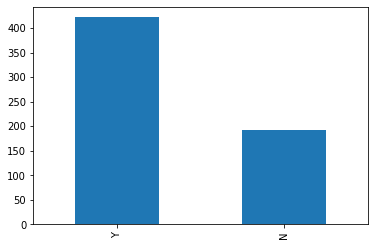

In [10]:
train.Loan_Status.value_counts().plot.bar()

* alomost 69% loans were apporved- more than 400 out of 614
* 31% loans are rejected

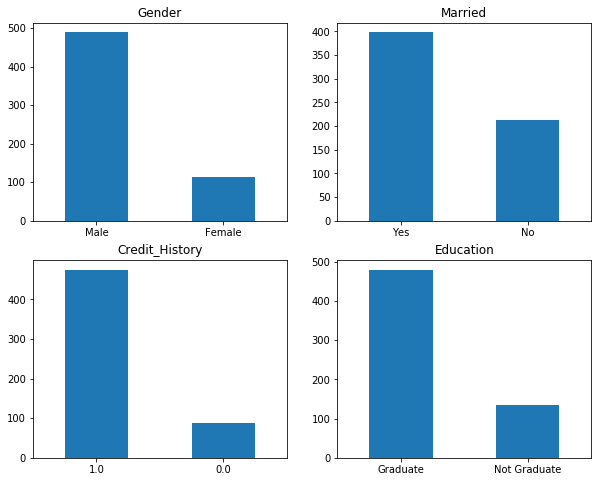

In [11]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
train["Gender"].value_counts().plot(kind='bar',ax=axes[0,0],title="Gender")
train["Married"].value_counts().plot(kind='bar',ax=axes[0,1],title="Married")
train["Education"].value_counts().plot(kind='bar',ax=axes[1,1],title="Education")
train["Credit_History"].value_counts().plot(kind='bar',ax=axes[1,0],title="Credit_History")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
plt.show()

* majority are males more than 81%
* almost 65% are married
* 15% are self employeed
* 85% have repai their previous loans

In [12]:
categorical=train.select_dtypes(["object"]).columns
numnerical=train.select_dtypes(["int64","float"]).columns

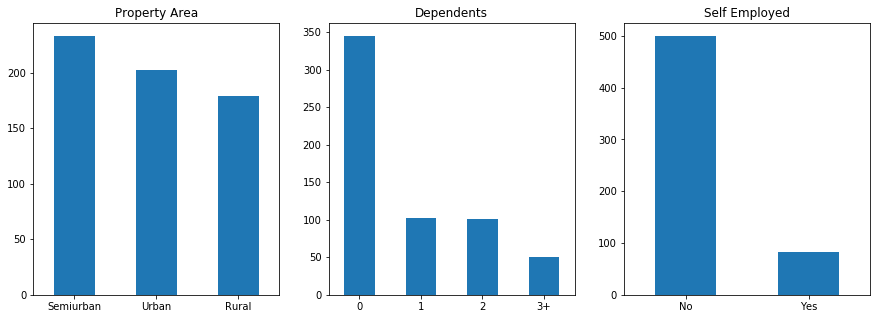

In [13]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
train["Property_Area"].value_counts().plot(kind='bar',ax=axes[0],title="Property Area")
train["Dependents"].value_counts().plot(kind='bar',ax=axes[1],title="Dependents")
train["Self_Employed"].value_counts().plot(kind='bar',ax=axes[2],title="Self Employed")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
plt.show()

* majority of them do not have any dependents
* only 15% are self employed
* most of the applicants are from semi-urban Property

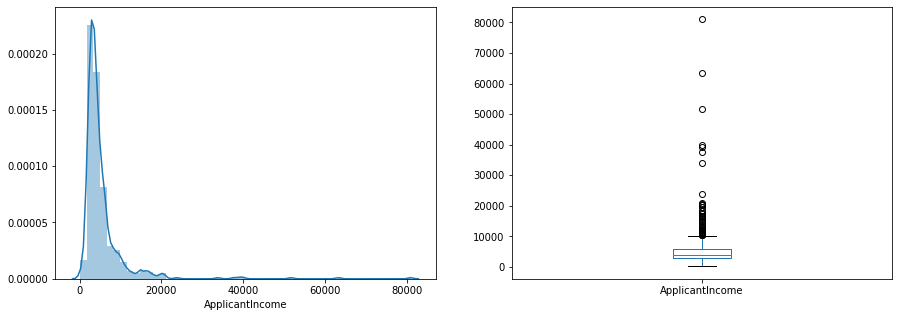

In [14]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(train["ApplicantIncome"],ax=axes[0])
train["ApplicantIncome"].plot.box(ax=axes[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
plt.show()

* Data is right skewed and we can also see many outliers in applicantincome as well, we have to make the data normally distributed

* lets look at applicant-income along with their education

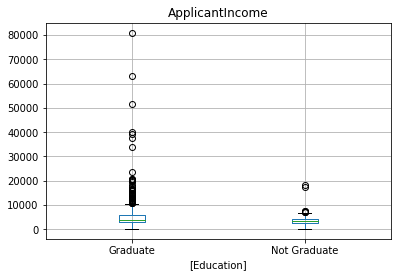

In [15]:
train.boxplot(column=["ApplicantIncome"],by=["Education"])
plt.suptitle("")
plt.show()

* Graduates with higher income appear to be outliers

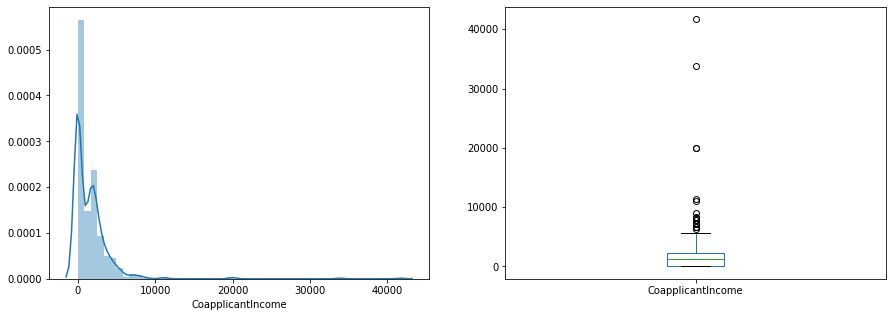

In [16]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(train["CoapplicantIncome"],ax=axes[0])
train["CoapplicantIncome"].plot.box(ax=axes[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
plt.show()

* This is also simliar to the income column,data is right skewed and we can see some outliers

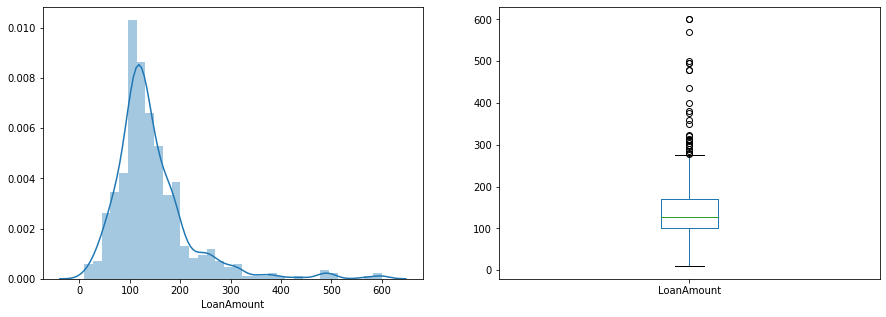

In [17]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
dft= train.dropna()
sns.distplot(dft["LoanAmount"],ax=axes[0])
dft["LoanAmount"].plot.box(ax=axes[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
plt.show()

 * This distribution is fairly Normal and we can see some outliers present

### Categorical Variable VS Target Variable

In [18]:
gend=pd.crosstab(train.Gender,train.Loan_Status)
gend

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


(array([0, 1]), <a list of 2 Text xticklabel objects>)

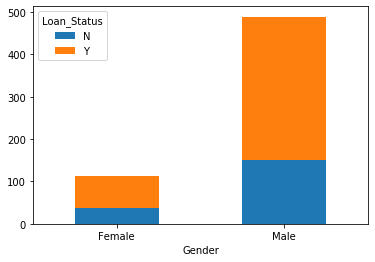

In [19]:
gend.plot.bar(stacked=True)
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

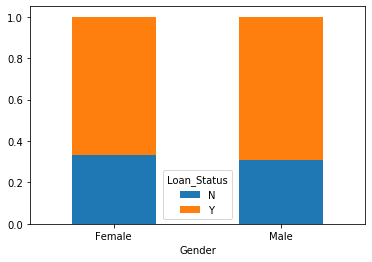

In [20]:
gend.div(gend.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xticks(rotation=0)

* almost same proportion of female and male ratio vs Loan approved status

In [21]:
mar=pd.crosstab(train.Married,train.Loan_Status)
dep=pd.crosstab(train.Dependents,train.Loan_Status)
edu=pd.crosstab(train.Education,train.Loan_Status)
se=pd.crosstab(train.Self_Employed,train.Loan_Status)

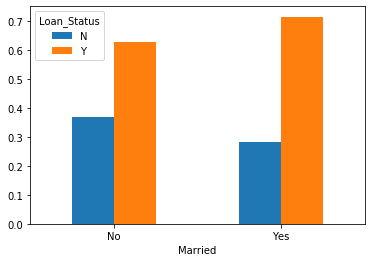

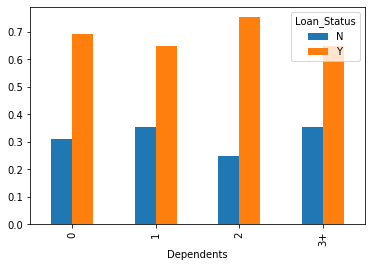

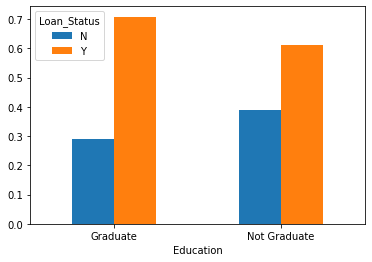

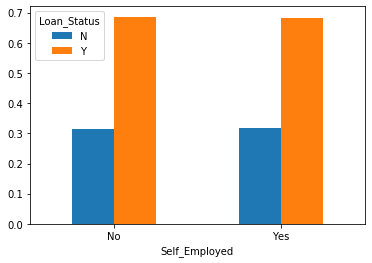

In [22]:
mar.div(mar.sum(1).astype(float),axis=0).plot(kind="bar")
plt.xticks(rotation=0)
dep.div(dep.sum(1).astype(float),axis=0).plot(kind="bar")
edu.div(edu.sum(1).astype(float),axis=0).plot(kind="bar")
plt.xticks(rotation=0)
se.div(se.sum(1).astype(float),axis=0).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

* Married applicants approval rate is higher than not married
* Self employed seems equally distributed with not self-employed again loan-status
* Graduate applicants approval rate is higher than not not graduated
* dependents of 1 and 3+ seems equally distributed with eachother again loan-status

In [23]:
credit=pd.crosstab(train.Credit_History,train.Loan_Status)
proarea=pd.crosstab(train.Property_Area,train.Loan_Status)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

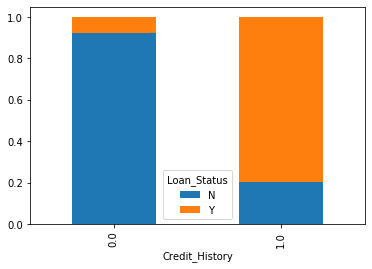

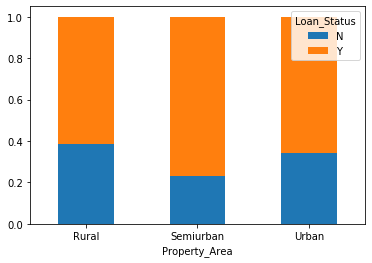

In [24]:
credit.div(credit.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
proarea.div(proarea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xticks(rotation=0)

*  Credit history 1 has high approval rate 
* Semiurban application have higher rate of approval in loan-status

## Numerical Independent Variable VS Target Variable

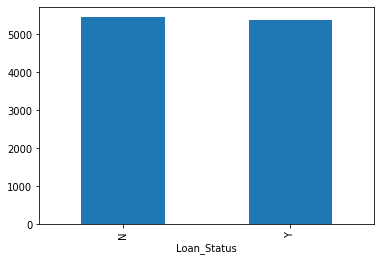

In [25]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

* mean seems to be equal so we need to split them further based on their income

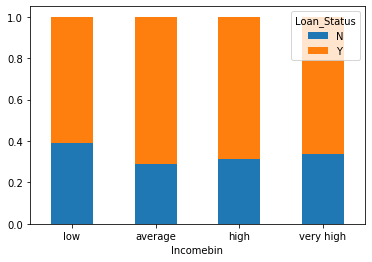

In [26]:
bins=[0,2000,4000,6000,85000]
group=['low',"average","high","very high"]
train["Incomebin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)
income=pd.crosstab(train["Incomebin"],train.Loan_Status)
income.div(income.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xticks(rotation=0)
plt.show()

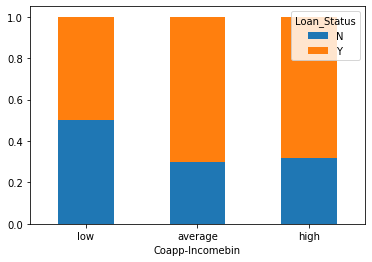

In [27]:
bins=[0,1000,3000,45000]
groups=['low',"average","high"]
train["Coapp-Incomebin"]=pd.cut(train["ApplicantIncome"],bins,labels=groups)
co_income=pd.crosstab(train["Coapp-Incomebin"],train.Loan_Status)
co_income.div(co_income.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xticks(rotation=0)
plt.show()

* Now we are combining both individual income and his co-applicant income

In [28]:
train["Total_income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

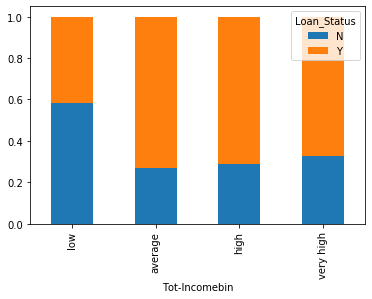

In [29]:
bins=[0,2500,4000,6000,85000]
group=['low',"average","high","very high"]
train["Tot-Incomebin"]=pd.cut(train["Total_income"],bins,labels=group)
totincome=pd.crosstab(train["Tot-Incomebin"],train.Loan_Status)
totincome.div(totincome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

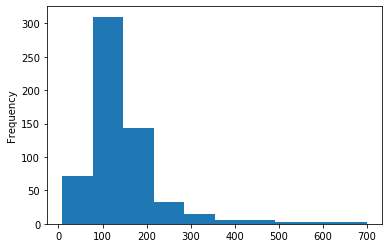

In [30]:
train.LoanAmount.plot(kind="hist",bins=10)

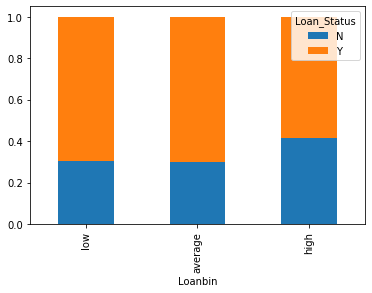

In [31]:
bins=[0,100,300,750]
group=['low',"average","high"]
train["Loanbin"]=pd.cut(train["LoanAmount"],bins,labels=group)
loan=pd.crosstab(train["Loanbin"],train.Loan_Status)
loan.div(loan.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

## Data Cleaning

In [32]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Incomebin', 'Coapp-Incomebin', 'Total_income', 'Tot-Incomebin',
       'Loanbin'],
      dtype='object')

In [33]:
train.drop(['Incomebin', 'Coapp-Incomebin', 'Total_income', 'Tot-Incomebin',
       'Loanbin'],axis=1,inplace=True)

In [34]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
train["Dependents"].replace("3+",3,inplace=True)
test["Dependents"].replace("3+",3,inplace=True)

In [36]:
train["Loan_Status"].replace("N",0,inplace=True)
train["Loan_Status"].replace("Y",1,inplace=True)

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [38]:
# heatmap

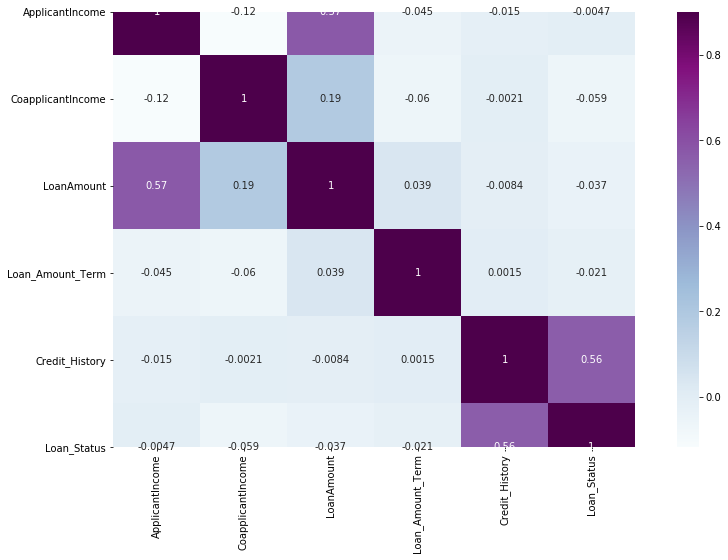

In [39]:
f, ax = plt.subplots(figsize=(15,8))
corr=train.corr()
sns.heatmap(corr,vmax=.9,square=True,cmap="BuPu",ax=ax,annot=True)

In [40]:
#sns.pairplot(train,hue="Loan_Status")

In [41]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


## Null values and missing values Treatment

In [42]:
train.isnull().sum()/train.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

* gender,married,dependents,self_employed and credit_history are category variables and we can use mode values of those for imutation

In [43]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)

In [44]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

* 512 values are 360 so we can impute those 14  missing values with 360
* loan amount is countinous and numerical so we can use median to impute missing values

In [46]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [47]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Doing  the same for test Data

In [48]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [50]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

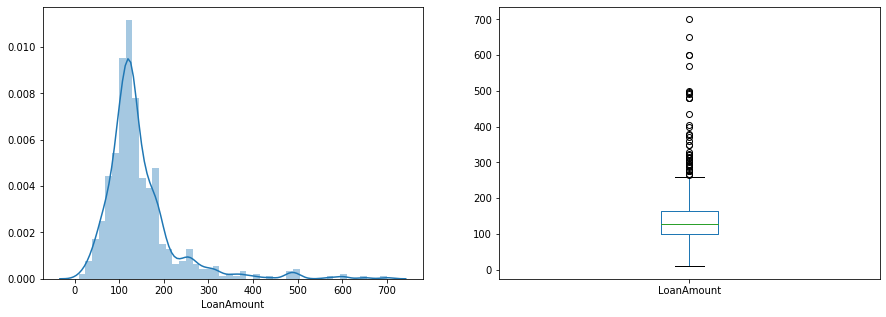

In [51]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
dft= train.dropna()
sns.distplot(dft["LoanAmount"],ax=axes[0])
dft["LoanAmount"].plot.box(ax=axes[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
plt.show()

* due to right skewness we can use log tranformation

In [52]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()

In [53]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [54]:
train[["ApplicantIncome","LoanAmount"]]=x.fit_transform(train[["ApplicantIncome","LoanAmount"]])
test[["ApplicantIncome","LoanAmount"]]=x.fit_transform(test[["ApplicantIncome","LoanAmount"]])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072991,0.0,-0.211241,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,-0.134412,1508.0,-0.211241,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,-0.393747,0.0,-0.948996,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,-0.462062,2358.0,-0.306435,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,0.097728,0.0,-0.056551,360.0,1.0,Urban,1


In [55]:
train.LoanAmount.value_counts()

-0.211241    33
-0.306435    20
-0.425428    17
-0.544421    15
 0.169536    12
             ..
-1.424968     1
 2.739780     1
 0.526514     1
-0.722910     1
-0.675313     1
Name: LoanAmount, Length: 203, dtype: int64

In [56]:
# train=train.drop("LoanAmount",axis=1)
# test=test.drop("LoanAmount",axis=1)

In [57]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072991,0.0,-0.211241,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,-0.134412,1508.0,-0.211241,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,-0.393747,0.0,-0.948996,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,-0.462062,2358.0,-0.306435,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,0.097728,0.0,-0.056551,360.0,1.0,Urban,1


In [58]:
X=train.drop("Loan_Status",axis=1)
y=train.Loan_Status

In [59]:
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [60]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,0.0,-0.211241,360.0,1.0,1,1,0,1,0,0,0,0,0,1
1,-0.134412,1508.0,-0.211241,360.0,1.0,0,1,1,0,1,0,0,0,0,0
2,-0.393747,0.0,-0.948996,360.0,1.0,1,1,1,1,0,0,0,1,0,1
3,-0.462062,2358.0,-0.306435,360.0,1.0,1,1,1,1,0,0,1,0,0,1
4,0.097728,0.0,-0.056551,360.0,1.0,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,0.0,-0.889500,360.0,1.0,1,0,0,1,0,0,0,0,0,0
610,-0.212557,0.0,-1.258378,180.0,1.0,1,1,1,0,0,0,0,0,0,0
611,0.437174,240.0,1.276168,360.0,1.0,1,1,1,0,1,0,0,0,0,1
612,0.357064,0.0,0.490816,360.0,1.0,1,1,1,0,0,1,0,0,0,1


In [61]:
X=pd.get_dummies(X,drop_first=True)


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
pred=model.predict(X_test)

In [66]:
accuracy_score(y_test,pred)

0.8324324324324325

In [67]:
pred_test=model.predict(test)

In [68]:

sub=pd.read_csv("sample_submission_49d68Cx.csv")

In [69]:
sub["Loan_Status"]=pred_test
sub["Loan_ID"]=test_ori["Loan_ID"]
sub

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [70]:
sub["Loan_Status"].replace(0,"N",inplace=True)
sub["Loan_Status"].replace(1,"Y",inplace=True)

In [71]:
sub.to_csv("loan.csv")

In [72]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix

array([[ 22,  29],
       [  2, 132]], dtype=int64)

In [73]:

print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.8324324324324325
Precision: 0.8198757763975155
Recall: 0.9850746268656716


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



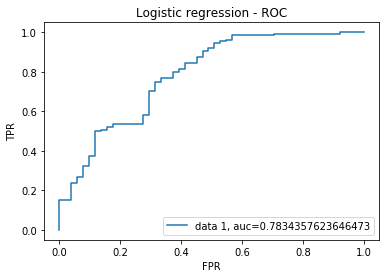

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic regression - ROC")
plt.legend(loc=4)
plt.show()

### we need to tune the model using Feature selection

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,recall_score, classification_report,f1_score

In [77]:
lr=LogisticRegression(solver='liblinear')
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
algo=[lr,dtc,rf,knn]

In [78]:
train_confusion_matrix=[]
test_confusion_matrix=[]
train_auc_score=[]
test_auc_score=[]
train_f1=[]
test_f1=[]
train_recall=[]
test_recall=[]
test_probality=[]
train_acc=[]
test_acc=[]
for i in algo:
    i.fit(X_train,y_train)
    print(i)
    train_prob=i.predict_proba(X_train)[:,1]
    train_pred=i.predict(X_train)
    print("Confusion_matrix_Train")
    train_confusion_matrix.append(confusion_matrix(y_train,train_pred))
    print(confusion_matrix(y_train,train_pred))
    print(classification_report(y_train,train_pred))
    roc_auc_scores_train=roc_auc_score(y_train,train_prob)
    print("auc_score_train-",roc_auc_scores_train)
    train_acc.append(accuracy_score(y_train,train_pred))
    train_auc_score.append(roc_auc_scores_train)
    train_f1.append(f1_score(y_train,train_pred))
    train_recall.append(recall_score(y_train,train_pred))
    test_pred=i.predict(X_test)
    test_prob=i.predict_proba(X_test)[:,1]
    test_probality.append(test_prob)
    print("Confusion_matrix_Test")
    print(confusion_matrix(y_test,test_pred))
    test_confusion_matrix.append(confusion_matrix(y_test,test_pred))
    print(classification_report(y_test,test_pred))
    roc_auc_scores_test=roc_auc_score(y_test,test_prob)
    print("auc_score_test-",roc_auc_scores_test)
    test_acc.append(accuracy_score(y_test,test_pred))
    test_auc_score.append(roc_auc_scores_test)
    test_f1.append(f1_score(y_test,test_pred))
    test_recall.append(recall_score(y_test,test_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion_matrix_Train
[[ 62  79]
 [  6 282]]
              precision    recall  f1-score   support

           0       0.91      0.44      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.82      0.80      0.78       429

auc_score_train- 0.7884899527186762
Confusion_matrix_Test
[[ 22  29]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       18

In [79]:
metric_df=pd.DataFrame({"train_confusion_matrix":train_confusion_matrix,"test_confusion_matrix":test_confusion_matrix
              ,"train_auc_score":train_auc_score,"test_auc_score":test_auc_score,"train_f1":train_f1,"test_f1":
             test_f1,"train_recall":train_recall,"test_recall":test_recall,
                       "train_acc":train_acc,"test_acc":test_acc}
             ,index=["logistic_Regrssion","Decision_Tree","Random_Forest","Knn"]).T
metric_df

,logistic_Regrssion,Decision_Tree,Random_Forest,Knn
train_confusion_matrix,"[[62, 79], [6, 282]]","[[141, 0], [0, 288]]","[[139, 2], [1, 287]]","[[59, 82], [26, 262]]"
test_confusion_matrix,"[[22, 29], [2, 132]]","[[26, 25], [27, 107]]","[[28, 23], [23, 111]]","[[8, 43], [12, 122]]"
train_auc_score,0.78849,1,0.999557,0.807329
test_auc_score,0.783436,0.654156,0.739903,0.558824
train_f1,0.869029,1,0.994801,0.829114
test_f1,0.894915,0.804511,0.828358,0.816054
train_recall,0.979167,1,0.996528,0.909722
test_recall,0.985075,0.798507,0.828358,0.910448
train_acc,0.801865,1,0.993007,0.748252
test_acc,0.832432,0.718919,0.751351,0.702703


* Decision tree and random forest overfitted which is the character of tree-based models.
* logistic regression performed well and it cannot further tuned.Knn with default neighbours of 5 has overfitted lightly.

In [80]:
knn=KNeighborsClassifier()

In [81]:
scalar=StandardScaler()
X_train_s=scalar.fit_transform(X_train)
X_test_s=scalar.transform(X_test)

In [82]:
test_auc=[]
train_auc=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train_s,y_train)
    train_prob=knn.predict_proba(X_train_s)[:,1]
    train_auc.append(roc_auc_score(y_train,train_prob))
    pred=knn.predict(X_test_s)
    pred_prob=knn.predict_proba(X_test_s)[:,1]
    test_auc.append(roc_auc_score(y_test,pred_prob))
    
  

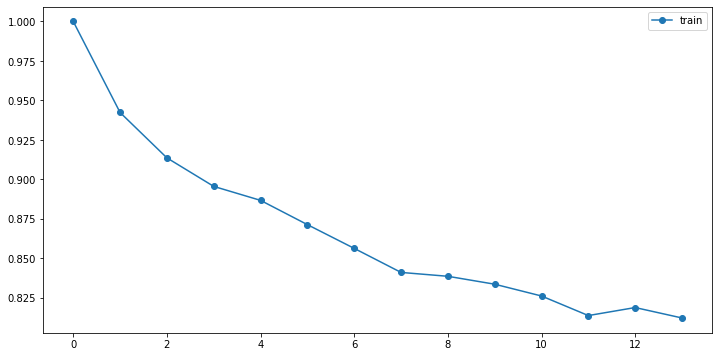

In [83]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot(np.arange(14),train_auc,marker = "o",label="train")

plt.legend()
plt.show()

In [84]:
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)

    y_train_pred=algo.predict(Xtrain)
    y_train_prob=algo.predict_proba(Xtrain)[:,1]
    from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
    y_test_pred=algo.predict(Xtest)
    y_test_prob=algo.predict_proba(Xtest)[:,1]
    print(algo)
    print('\n'*1)
    print(' Accuracy score of train: ', accuracy_score(ytrain,y_train_pred))
    print(' Accuracy score of test: ', accuracy_score(ytest,y_test_pred))
    print('\n'*1)
    print(' Confusion Matrix of train: ', confusion_matrix(ytrain,y_train_pred))
    print(' Confusion Matrix of test: ', confusion_matrix(ytest,y_test_pred))
    print('\n'*1)
    print(' Auc of train: ', roc_auc_score(ytrain,y_train_prob))
    print(' Auc of test: ', roc_auc_score(ytest,y_test_prob))

In [85]:
model_eval(KNeighborsClassifier(n_neighbors=43),X_train_s,y_train,X_test_s,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='uniform')


 Accuracy score of train:  0.7365967365967366
 Accuracy score of test:  0.7783783783783784


 Confusion Matrix of train:  [[ 30 111]
 [  2 286]]
 Confusion Matrix of test:  [[ 10  41]
 [  0 134]]


 Auc of train:  0.7632855594956659
 Auc of test:  0.7707052970441908
